In [2]:
import glob
import math
import os
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.measure as ski
import re

from pathlib import Path
cur_dir = Path().resolve()
sys.path.append(str(cur_dir) + "/module")

Text(0.5, 1.0, 'Velocity - Positon')

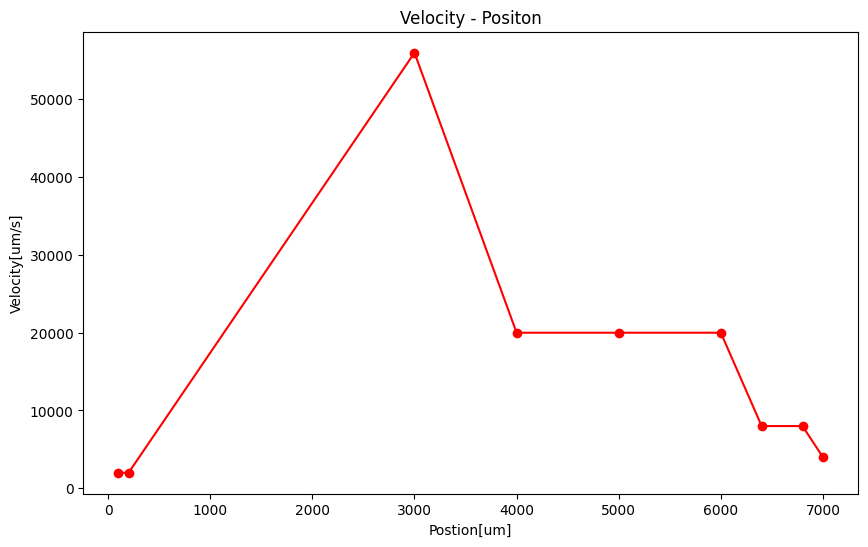

In [22]:
csv_filepath = r'C:\work\Pyhton\jupyter\graph_create\csv\movement.csv'
data = pd.read_csv(csv_filepath, parse_dates=['datetime'])

# 時刻を秒単位の経過時間に変換
data['time_seconds'] = (data['datetime'] - data['datetime'].iloc[0]).dt.total_seconds()

# 速度と位置のグラフを描画
fig, ax = plt.subplots(figsize=(10, 6))
velocity = data['positon[um]'].diff() / data['time_seconds'].diff()
ax.plot(data['positon[um]'], velocity, marker='o', color='r')
ax.set_xlabel('Postion[um]')
ax.set_ylabel('Velocity[um/s]')
ax.set_title('Velocity - Positon')

